In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Arun5420/Datasets/main/auto-mpg.csv")

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.shape

(398, 9)

In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [9]:
df.info

<bound method DataFrame.info of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1        

In [10]:
df['horsepower']=df['horsepower'].replace('?',np.nan)
df['horsepower']=df['horsepower'].astype(float)

In [11]:
median=df['horsepower'].median()
median

93.5

In [15]:
df['horsepower'].replace(np.nan,median,inplace=True)

In [16]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [18]:
### duplicates
duplicate=df.duplicated()

In [19]:
duplicate.sum()

0

In [20]:
### outliers

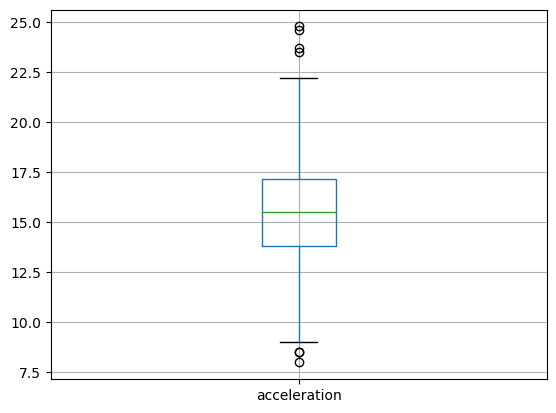

In [22]:
df.boxplot(column="acceleration")
plt.show()

In [23]:
def remove_outlier(col):
    sorted (col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range, upper_range

In [25]:
lowacc,highacc=remove_outlier(df["acceleration"])

In [34]:
df["acceleration"]=np.where(df["acceleration"]>highacc,highacc,df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]<lowacc,lowacc,df["acceleration"])

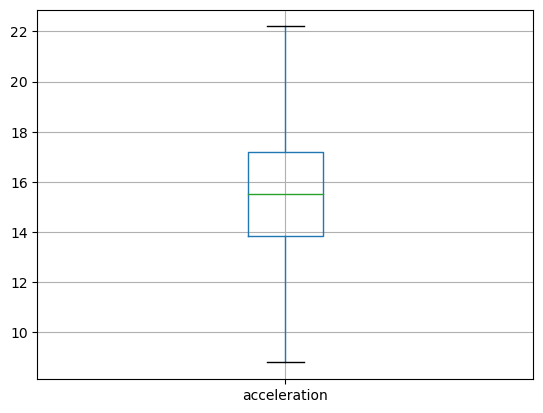

In [35]:
df.boxplot(column="acceleration")
plt.show()

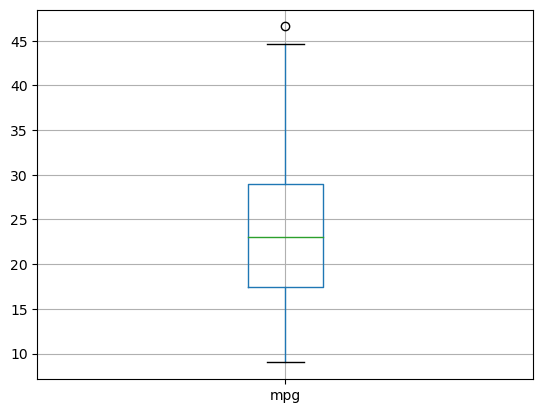

In [38]:
df.boxplot(column="mpg")
plt.show()

In [39]:
def remove_outlier(col):
    sorted (col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range, upper_range

In [40]:
lowmpg,highmpg =remove_outlier(df["mpg"])

In [41]:
df["mpg"]=np.where(df["mpg"]>highmpg,highmpg,df["mpg"])
df["mpg"]=np.where(df["mpg"]<lowmpg,lowmpg,df["mpg"])

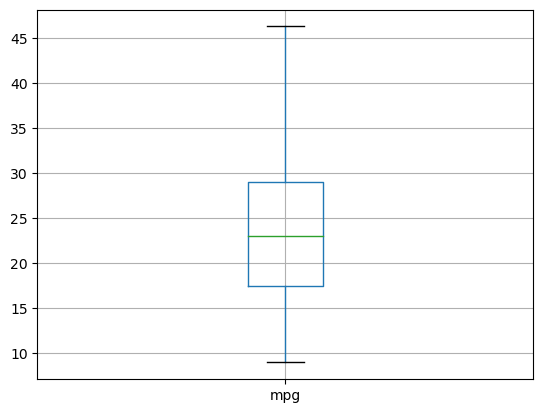

In [42]:
df.boxplot(column="mpg")
plt.show()

In [44]:
### dropping column
df=df.drop("car name",axis=1)

In [45]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,93.5,3504,12.0,70,1
1,15.0,8,350.0,93.5,3693,11.5,70,1
2,18.0,8,318.0,93.5,3436,11.0,70,1
3,16.0,8,304.0,93.5,3433,12.0,70,1
4,17.0,8,302.0,93.5,3449,10.5,70,1


In [46]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
211,16.5,6,168.0,93.5,3820,16.7,76,2
103,11.0,8,400.0,93.5,4997,14.0,73,1
134,16.0,6,258.0,93.5,3632,18.0,74,1
353,33.0,4,105.0,93.5,2190,14.2,81,2
299,27.2,4,141.0,93.5,3190,22.2,79,2
317,34.3,4,97.0,93.5,2188,15.8,80,2
350,34.7,4,105.0,93.5,2215,14.9,81,1
55,27.0,4,97.0,93.5,1834,19.0,71,2
13,14.0,8,455.0,93.5,3086,10.0,70,1
206,26.5,4,140.0,93.5,2565,13.6,76,1


In [47]:
df["origin"]=df["origin"].replace({1:"america",2:"europe",3:"asia"})

In [48]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
380,36.0,4,120.0,93.5,2160,14.5,82,asia
27,11.0,8,318.0,93.5,4382,13.5,70,america
377,31.0,4,91.0,93.5,1970,17.6,82,asia
108,20.0,4,97.0,93.5,2279,19.0,73,asia
68,13.0,8,350.0,93.5,4502,13.5,72,america
175,29.0,4,90.0,93.5,1937,14.0,75,europe
109,21.0,4,140.0,93.5,2401,19.5,73,america
284,20.6,6,225.0,93.5,3360,16.6,79,america
167,29.0,4,97.0,93.5,2171,16.0,75,asia
346,32.3,4,97.0,93.5,2065,17.8,81,asia


In [49]:
df=pd.get_dummies(df,columns=["origin"])

In [50]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
211,16.5,6,168.0,93.5,3820,16.7,76,0,0,1
188,16.0,8,318.0,93.5,4190,13.0,76,1,0,0
196,24.5,4,98.0,93.5,2164,22.1,76,1,0,0
31,25.0,4,113.0,93.5,2228,14.0,71,0,1,0
205,28.0,4,97.0,93.5,2155,16.4,76,0,1,0
151,31.0,4,79.0,93.5,2000,16.0,74,0,0,1
214,13.0,8,302.0,93.5,3870,15.0,76,1,0,0
191,22.0,6,225.0,93.5,3233,15.4,76,1,0,0
1,15.0,8,350.0,93.5,3693,11.5,70,1,0,0
312,37.2,4,86.0,93.5,2019,16.4,80,0,1,0


In [ ]:
https://raw.githubusercontent.com/Premalatha-success/edForce/main/loan_prediction.csv